## Exploratory Data Analysis on California Housing Dataset

1. Loading and Exploring dataset properties

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Datatypes of features

- Categrorical : ocean_proximity
- Numerical : housing_median_age, total_rooms, total_bedrooms, population, households, median_income
- Better if binned : longitude, latitude

### Univariate Analysis

#### HouseAge (Median Age of Housing)

- The distribution of `housing_median_age` is **multimodal**, with multiple peaks.
- There are noticeable spikes at certain age values, especially at **52**, suggesting a capping in the dataset.
- This indicates housing was built in **distinct development phases**, not uniformly over time.
- No clear outliers, but the artificial ceiling at 52 might reduce model accuracy in age-sensitive predictions.
- Since correlation between `median_house_value` and `housing_median_age` is very less (i.e. 0.105). It does not have much effect but still it is better to bin data in new, mid age, old and capped house age groups


In [6]:
df['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

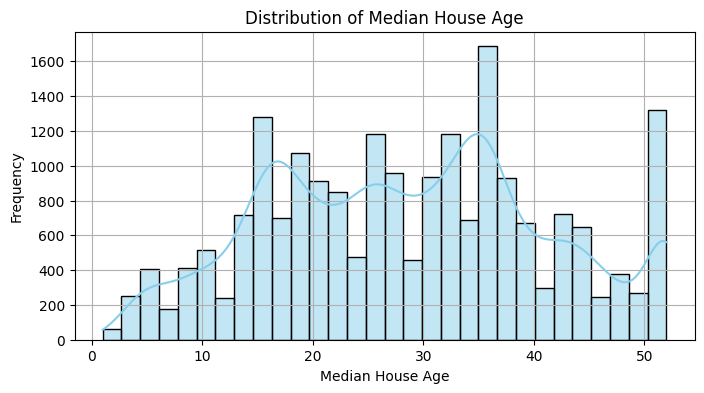

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(df['housing_median_age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Median House Age')
plt.xlabel('Median House Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

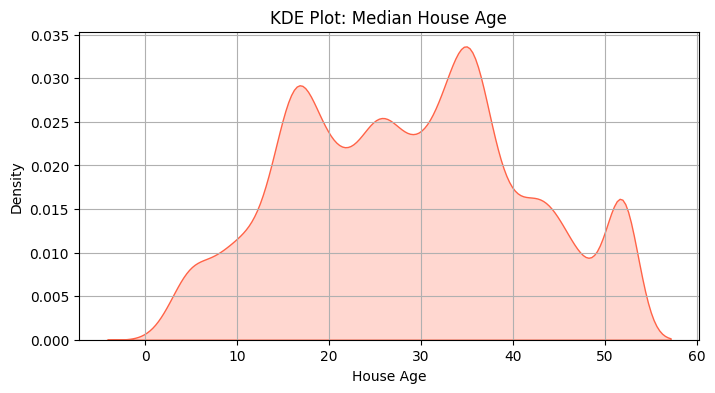

In [10]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['housing_median_age'], fill=True, color='tomato')
plt.title('KDE Plot: Median House Age')
plt.xlabel('House Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [11]:
df['housing_median_age'].corr(df['median_house_value'])


np.float64(0.10562341249320999)

In [12]:
df['housing_median_age'].value_counts()

housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

In [33]:
df['house_age_group'] = pd.cut(df['housing_median_age'], 
                                bins=[0, 15, 30, 51.9, 52], 
                                labels=['New', 'MidAge', 'Old', 'Capped'], 
                                include_lowest=True)
df = pd.get_dummies(df, columns=['house_age_group'], drop_first=True)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age_group_MidAge,house_age_group_Old,house_age_group_Capped
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,True,False,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False,False,True
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False,False,True
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False,False,True


In [34]:
print(df['house_age_group_Capped'].value_counts())
print(df['house_age_group_MidAge'].value_counts())
print(df['house_age_group_Old'].value_counts())

house_age_group_Capped
False    19367
True      1273
Name: count, dtype: int64
house_age_group_MidAge
False    12782
True      7858
Name: count, dtype: int64
house_age_group_Old
False    12418
True      8222
Name: count, dtype: int64


#### median_income (Median Income of a household)

- Median income ranges from ~0.5 to 15 with a right-skewed distribution and some high-income outliers (>6).
- Majority of houses have income around 3.5–4, matching the dataset’s average.
- Strong positive correlation (0.68) with median house value, making it a key predictor.
- Target variable is capped at $500K, causing a ceiling effect for high incomes.
- keeping `median_income` as is and adding an `is_capped` flag for capped house values.

In [35]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

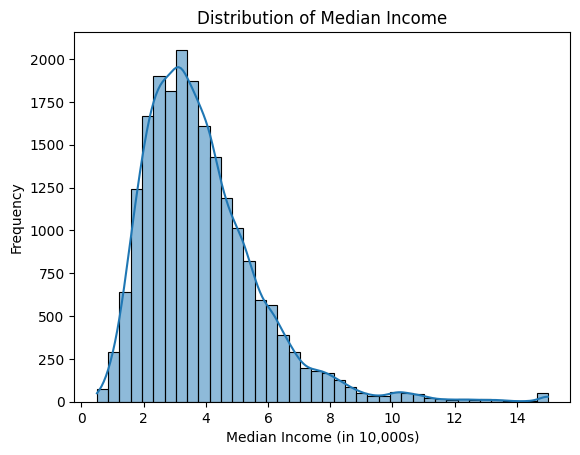

In [37]:
sns.histplot(df['median_income'], kde=True, bins=40)
plt.title("Distribution of Median Income")
plt.xlabel("Median Income (in 10,000s)")
plt.ylabel("Frequency")
plt.show()


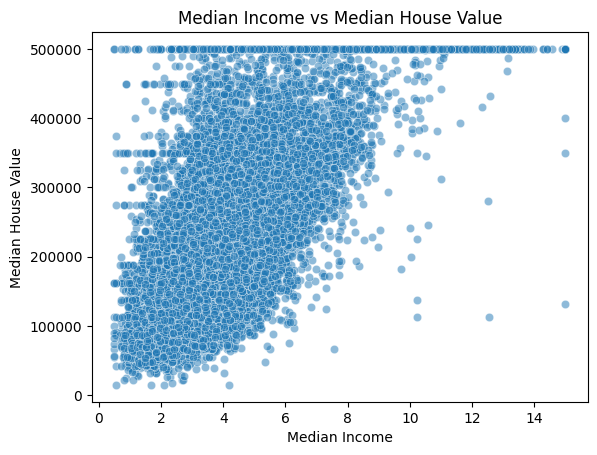

In [38]:
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


In [ ]:
df['median_income'].corr(df['median_house_value'])

np.float64(0.6880752079585484)

In [69]:
df['is_capped'] = (df['median_house_value'] >= 500000).astype(int)

#### total_rooms (Total number of rooms in a household)

- Total rooms range widely, with a strong right-skew and some extreme high-value outliers.
- Correlation with median house value is low to moderate (~0.1–0.2), showing limited predictive power alone.
- Log transformation or capping of extreme values can help reduce skewness.
- Scatter plots show some positive trend but high variance at larger room counts.
- Scaling or transformation is recommended before modeling.

In [41]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

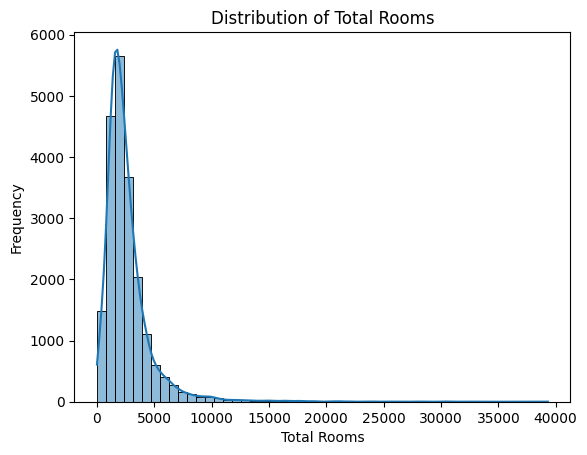

In [42]:
sns.histplot(df['total_rooms'], bins=50, kde=True)
plt.title('Distribution of Total Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')
plt.show()

In [43]:
corr = df['total_rooms'].corr(df['median_house_value'])
print(f"Correlation with Median House Value: {corr:.3f}")

Correlation with Median House Value: 0.134


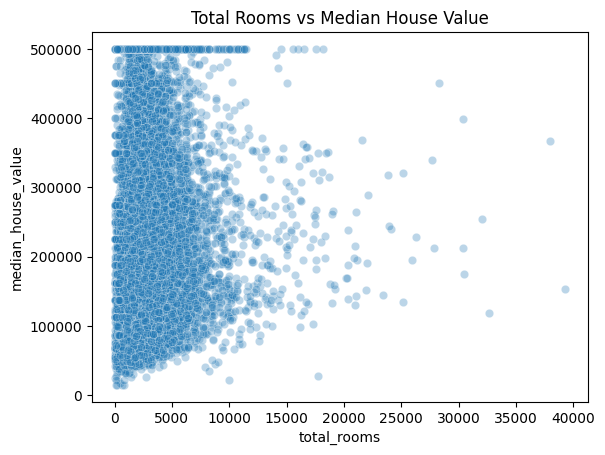

In [44]:
sns.scatterplot(x='total_rooms', y='median_house_value', data=df, alpha=0.3)
plt.title('Total Rooms vs Median House Value')
plt.show()


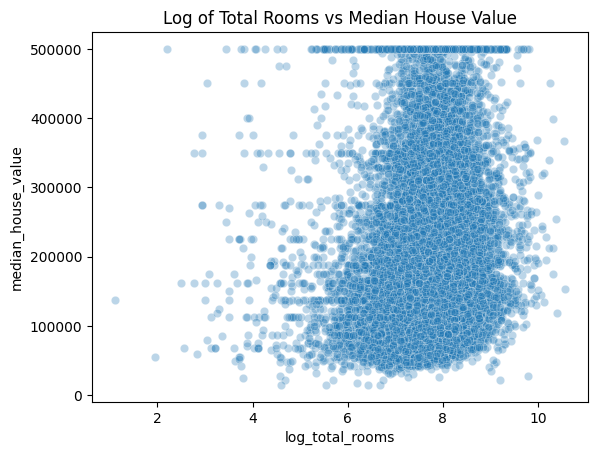

In [45]:
df['log_total_rooms'] = np.log1p(df['total_rooms'])
sns.scatterplot(x='log_total_rooms', y='median_house_value', data=df, alpha=0.3)
plt.title('Log of Total Rooms vs Median House Value')
plt.show()

#### total_bedrooms

- 207 missing values were imputed using the median.
- Strong correlation (0.927) with `total_rooms` → high multicollinearity risk.
- Weak correlation with target (`median_house_value`): 0.049.
- Created a derived feature `bedroom_ratio = total_bedrooms / total_rooms`.
- `bedroom_ratio` shows stronger negative correlation (-0.233) with the target, indicating better predictive potential.
- Final decision: Drop `total_bedrooms` and `total_rooms`, retain `bedroom_ratio`.

In [50]:
print(df['total_bedrooms'].describe())
missing_count = df['total_bedrooms'].isnull().sum()
print(f"Missing values: {missing_count}")


count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64
Missing values: 0


In [48]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms)


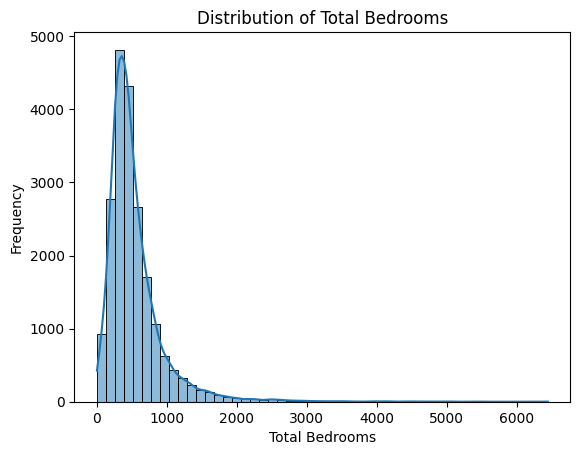

In [49]:
sns.histplot(df['total_bedrooms'], bins=50, kde=True)
plt.title('Distribution of Total Bedrooms')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.show()


In [51]:
corr = df['total_bedrooms'].corr(df['median_house_value'])
print(f"Correlation with Median House Value: {corr:.3f}")


Correlation with Median House Value: 0.049


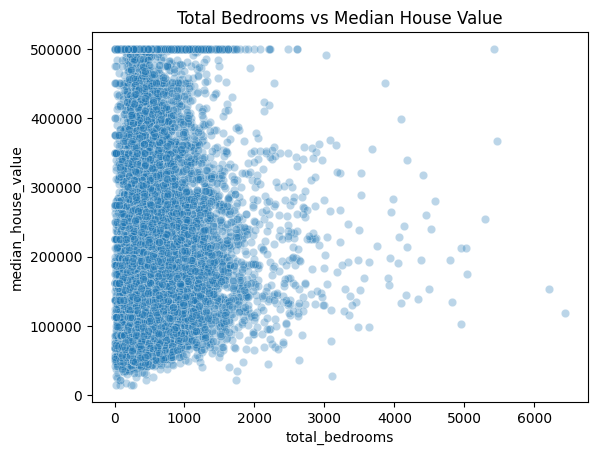

In [52]:
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=df, alpha=0.3)
plt.title('Total Bedrooms vs Median House Value')
plt.show()


In [53]:
df[['total_rooms', 'total_bedrooms']].corr()

,total_rooms,total_bedrooms
total_rooms,1.000000,0.927058
total_bedrooms,0.927058,1.000000


In [54]:
df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']
print(df['bedroom_ratio'].corr(df['median_house_value']))

-0.23330292651593845


#### population

- Raw `population` and `people_per_household` showed very low correlation with house value.
- `people_per_household` had extreme outliers (max = 1243), which skewed analysis.
- After capping outliers at 99th percentile, correlation improved to -0.274.
- Final decision: Drop `population`, retain `people_per_household_capped` as a valuable feature.

In [55]:
df['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

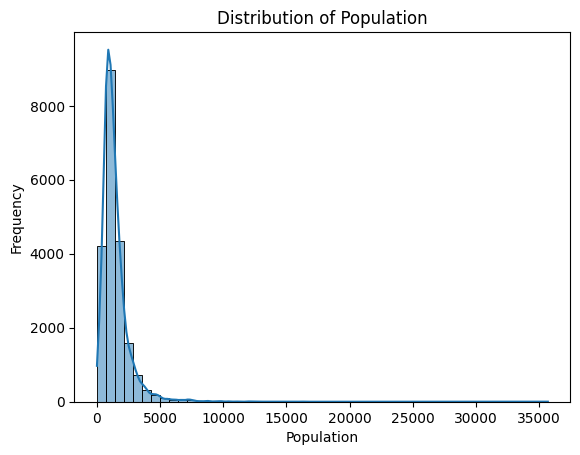

In [56]:
sns.histplot(df['population'], bins=50, kde=True)
plt.title("Distribution of Population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()


In [57]:
corr = df['population'].corr(df['median_house_value'])
print(f"Correlation with Median House Value: {corr:.3f}")


Correlation with Median House Value: -0.025


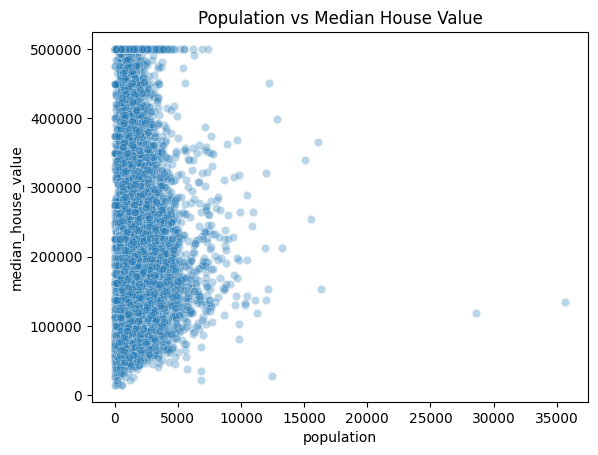

In [58]:
sns.scatterplot(x='population', y='median_house_value', data=df, alpha=0.3)
plt.title("Population vs Median House Value")
plt.show()


In [59]:
df['people_per_household'] = df['population'] / df['households']
print(df['people_per_household'].describe())
print(df['people_per_household'].corr(df['median_house_value']))

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: people_per_household, dtype: float64
-0.023737412956134345


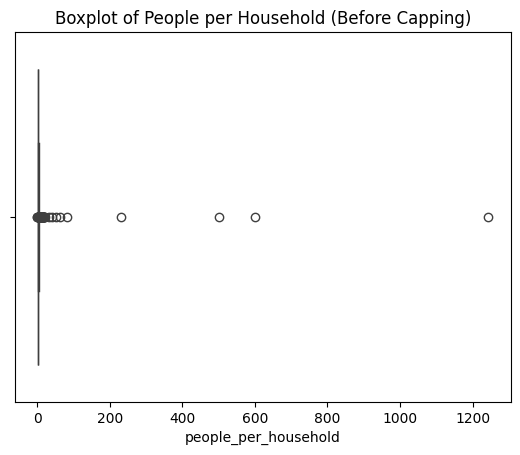

In [60]:
sns.boxplot(x=df['people_per_household'])
plt.title("Boxplot of People per Household (Before Capping)")
plt.show()


In [61]:
cap_value = df['people_per_household'].quantile(0.99)
df['people_per_household_capped'] = df['people_per_household'].clip(upper=cap_value)


In [62]:
corr = df['people_per_household_capped'].corr(df['median_house_value'])
print(f"Capped correlation: {corr:.4f}")


Capped correlation: -0.2739


#### households

- `households` has a weak correlation (0.065) with median house value.
- The distribution is skewed and adds limited predictive power.
- A derived feature `avg_rooms_per_household` shows better correlation (0.152).
- Final decision: Drop `households`, keep `avg_rooms_per_household`.

count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: households, dtype: float64


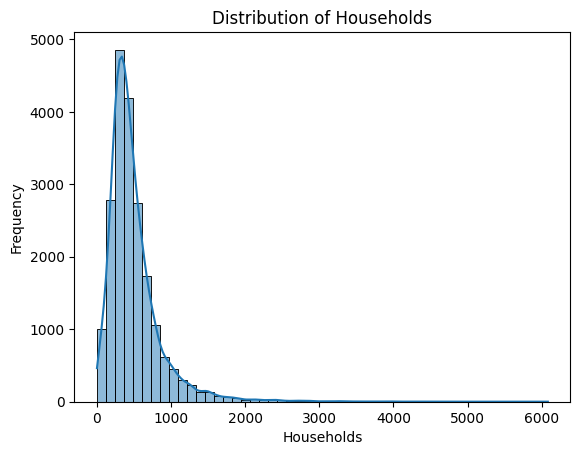

In [63]:
print(df['households'].describe())
sns.histplot(df['households'], bins=50, kde=True)
plt.title("Distribution of Households")
plt.xlabel("Households")
plt.ylabel("Frequency")
plt.show()


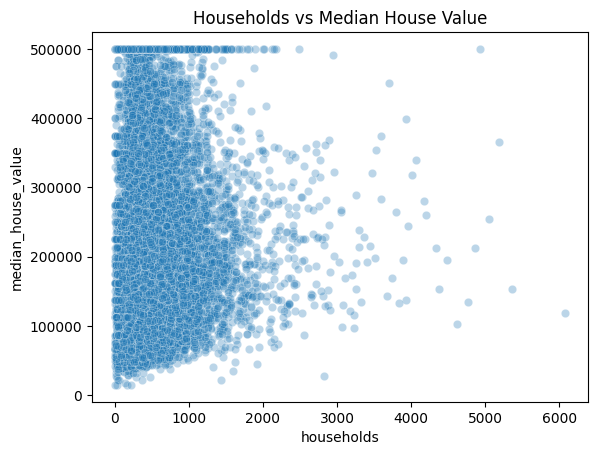

In [64]:
sns.scatterplot(x='households', y='median_house_value', data=df, alpha=0.3)
plt.title("Households vs Median House Value")
plt.show()

In [66]:
df['households'].corr(df['median_house_value'])

np.float64(0.06584265057005649)

In [65]:
df['avg_rooms_per_household'] = df['total_rooms'] / df['households']
print(df['avg_rooms_per_household'].corr(df['median_house_value']))

0.15194828974145796


Correlation of bedrooms_per_household with target: -0.0456


#### Longitude and Latitude Analysis

- Raw **longitude** and **latitude** have weak negative correlations with median house value (around -0.04 to -0.14), indicating limited linear predictive power alone.
- Polynomial features like **latitude²**, **longitude²**, and their **interaction term** slightly improve correlation, capturing some non-linear geographic effects.
- Engineered features such as **distance to nearest city** (correlation ~ -0.26) and **distance to coast** add meaningful spatial information.
- For linear regression, using polynomial and interaction terms along with distance features is recommended, while raw latitude and longitude can be dropped to reduce noise.


count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64


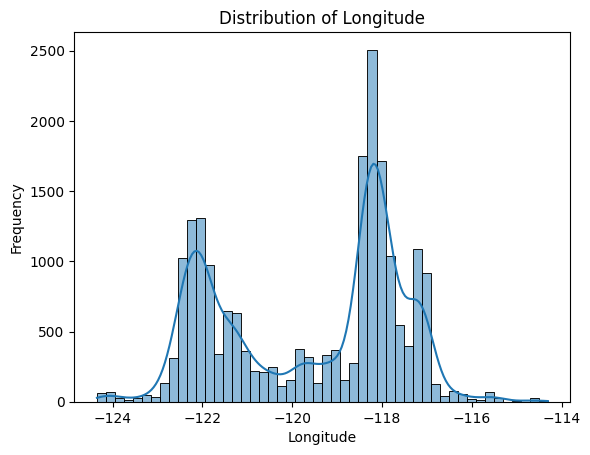

In [70]:
print(df['longitude'].describe())
sns.histplot(df['longitude'], bins=50, kde=True)
plt.title("Distribution of Longitude")
plt.xlabel("Longitude")
plt.ylabel("Frequency")
plt.show()

In [71]:
corr = df['longitude'].corr(df['median_house_value'])
print(f"Correlation with Median House Value: {corr:.4f}")

Correlation with Median House Value: -0.0460


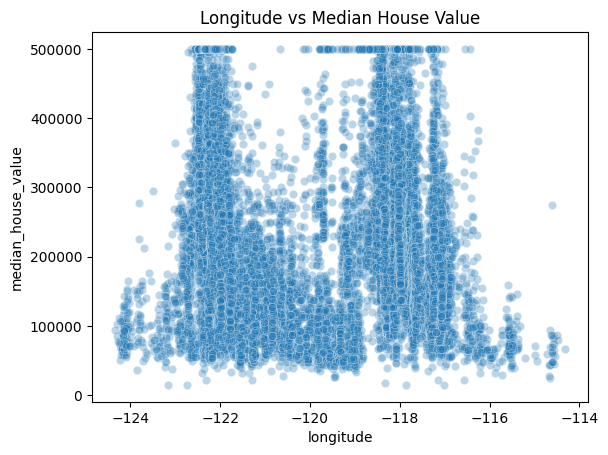

In [72]:
sns.scatterplot(x='longitude', y='median_house_value', data=df, alpha=0.3)
plt.title("Longitude vs Median House Value")
plt.show()

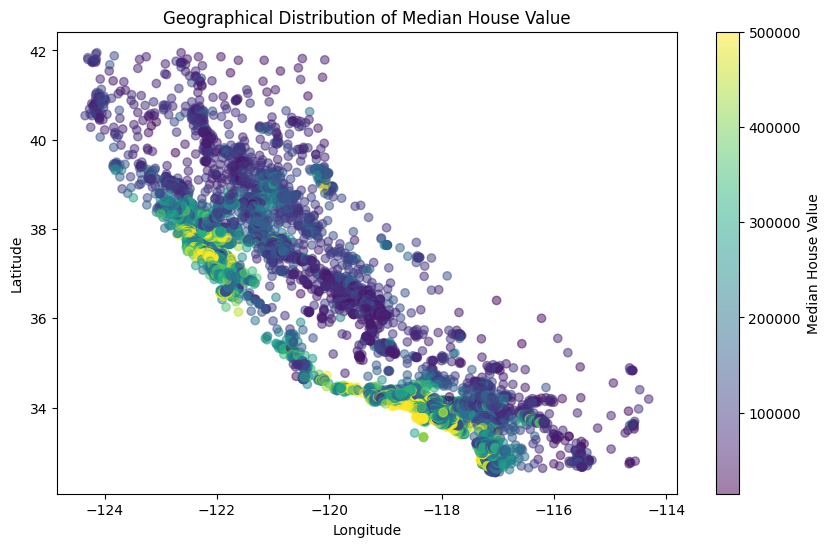

In [73]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Median House Value')
plt.show()

C:\Users\madan\AppData\Local\Temp\ipykernel_15148\391521572.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = df.groupby(['long_bin', 'lat_bin'])['median_house_value'].mean().unstack()


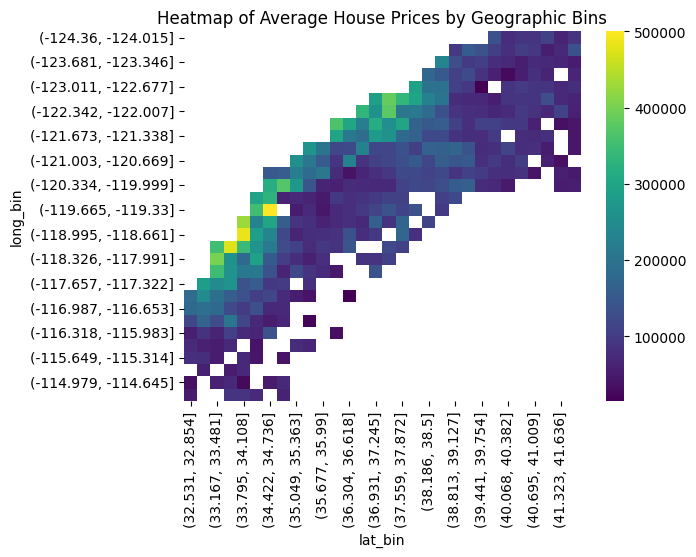

In [74]:
df['long_bin'] = pd.cut(df['longitude'], bins=30)
df['lat_bin'] = pd.cut(df['latitude'], bins=30)

mean_prices = df.groupby(['long_bin', 'lat_bin'])['median_house_value'].mean().unstack()
sns.heatmap(mean_prices, cmap='viridis')
plt.title('Heatmap of Average House Prices by Geographic Bins')
plt.show()

In [75]:
cities = {
    'Los Angeles': (34.0522, -118.2437),
    'San Francisco': (37.7749, -122.4194),
    'San Diego': (32.7157, -117.1611),
    'Sacramento': (38.5816, -121.4944),
    'Fresno': (36.7378, -119.7871),
    'Oakland': (37.8044, -122.2711)
}

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

def closest_city(lat, lon):
    distances = {city: haversine(lat, lon, c[0], c[1]) for city, c in cities.items()}
    return min(distances, key=distances.get)

df['nearest_city'] = df.apply(lambda row: closest_city(row['latitude'], row['longitude']), axis=1)

print(df['nearest_city'].value_counts())


nearest_city
Los Angeles      9480
Oakland          3506
Sacramento       2765
San Diego        1999
Fresno           1511
San Francisco    1379
Name: count, dtype: int64


In [76]:
df['distance_to_city'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], 
                                                      cities[row['nearest_city']][0], cities[row['nearest_city']][1]), axis=1)

def distance_to_coast(lat, lon):
    coast_lon = -124.4
    return haversine(lat, lon, lat, coast_lon)

df['distance_to_coast'] = df.apply(lambda row: distance_to_coast(row['latitude'], row['longitude']), axis=1)

print(df[['distance_to_city', 'distance_to_coast']].describe())


       distance_to_city  distance_to_coast
count      20640.000000       20640.000000
mean          53.520321         440.693983
std           55.829377         190.426389
min            0.355838           4.225142
25%           15.694046         229.253177
50%           34.090387         542.562664
75%           71.953228         589.763935
max          436.607011         927.679290


In [77]:
df['lat_lon_interaction'] = df['latitude'] * df['longitude']
df['latitude_sq'] = df['latitude'] ** 2
df['longitude_sq'] = df['longitude'] ** 2

In [78]:
features = ['latitude', 'longitude', 'lat_lon_interaction', 'latitude_sq', 'longitude_sq', 
            'distance_to_city', 'distance_to_coast']

corrs = df[features + ['median_house_value']].corr()['median_house_value'].sort_values(ascending=False)

print(corrs)


median_house_value     1.000000
lat_lon_interaction    0.104524
longitude_sq           0.045776
distance_to_coast     -0.036601
longitude             -0.045967
latitude              -0.144160
latitude_sq           -0.147865
distance_to_city      -0.260116
Name: median_house_value, dtype: float64


#### ocean proximity

- The dataset’s largest category is **"<1H OCEAN"** (9136 samples), followed by **"INLAND"** (6551 samples). The smallest is **"ISLAND"** with just 5 samples.
- Average median house values vary significantly across categories:
  - Highest average price is for **ISLAND** ($380,440), but the sample size is very small.
  - **"<1H OCEAN"** and **"NEAR BAY"** also show relatively high average house values (~$240K and ~$259K respectively).
  - **INLAND** houses have the lowest average median value (~$125K), indicating ocean proximity generally increases house prices.
- This feature is a strong categorical predictor of housing prices and should be **one-hot encoded** for regression.


In [79]:
print(df['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


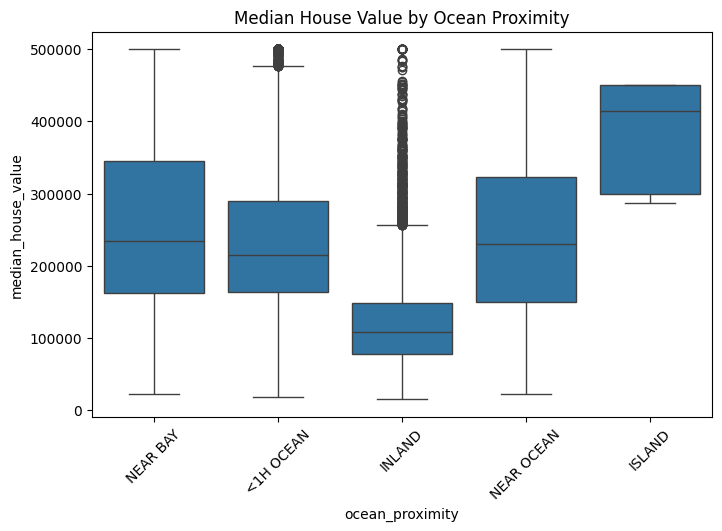

In [80]:
plt.figure(figsize=(8,5))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.xticks(rotation=45)
plt.title('Median House Value by Ocean Proximity')
plt.show()


In [81]:
print(df.groupby('ocean_proximity')['median_house_value'].mean())

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64


In [82]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,bedrooms_per_household,is_capped,long_bin,lat_bin,nearest_city,distance_to_city,distance_to_coast,lat_lon_interaction,latitude_sq,longitude_sq
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,1.023810,0,"(-122.342, -122.007]","(37.872, 38.186]",Oakland,9.148311,190.447895,-4630.0724,1434.8944,14940.1729
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.971880,0,"(-122.342, -122.007]","(37.559, 37.872]",Oakland,7.639532,191.377441,-4627.2492,1433.3796,14937.7284
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,1.073446,0,"(-122.342, -122.007]","(37.559, 37.872]",Oakland,5.759412,189.647489,-4626.7840,1432.6225,14942.6176
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,1.073059,0,"(-122.342, -122.007]","(37.559, 37.872]",Oakland,5.398534,188.769530,-4627.1625,1432.6225,14945.0625
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,1.081081,0,"(-122.342, -122.007]","(37.559, 37.872]",Oakland,5.398534,188.769530,-4627.1625,1432.6225,14945.0625


In [83]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,log_total_rooms,...,people_per_household,people_per_household_capped,avg_rooms_per_household,bedrooms_per_household,is_capped,distance_to_city,distance_to_coast,lat_lon_interaction,latitude_sq,longitude_sq
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,...,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,7.629377,...,3.070655,2.915167,5.429000,1.100910,0.048062,53.520321,440.693983,-4264.448003,1274.191621,14300.928169
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.749991,...,10.386050,0.734751,2.474173,0.519159,0.213902,55.829377,190.426389,323.904337,154.386369,480.328440
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.098612,...,0.692308,0.692308,0.846154,0.121204,0.000000,0.355838,4.225142,-5207.673000,1058.851600,13066.776100
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,7.278456,...,2.429741,2.429741,4.440716,1.005525,0.000000,15.694046,229.253177,-4601.026500,1151.244900,13926.360100
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,7.662938,...,2.818116,2.818116,5.229129,1.048860,0.000000,34.090387,542.562664,-4060.278900,1173.747600,14039.880100
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,8.054840,...,3.282261,3.282261,6.052381,1.100015,0.000000,71.953228,589.763935,-4004.349775,1422.044100,14835.240000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,10.579514,...,1243.333333,5.394812,141.909091,34.066667,1.000000,436.607011,927.679290,-3753.968400,1759.802500,15462.922500


In [84]:
cols_to_drop = ['housing_median_age','total_rooms', 'total_bedrooms', 'population', 'people_per_household', 'latitude', 'longitude']
df = df.drop(columns=cols_to_drop)

In [85]:
df.head()

,households,median_income,median_house_value,ocean_proximity,house_age_group_MidAge,house_age_group_Old,house_age_group_Capped,log_total_rooms,bedroom_ratio,people_per_household_capped,...,bedrooms_per_household,is_capped,long_bin,lat_bin,nearest_city,distance_to_city,distance_to_coast,lat_lon_interaction,latitude_sq,longitude_sq
0,126.0,8.3252,452600.0,NEAR BAY,False,True,False,6.781058,0.146591,2.555556,...,1.023810,0,"(-122.342, -122.007]","(37.872, 38.186]",Oakland,9.148311,190.447895,-4630.0724,1434.8944,14940.1729
1,1138.0,8.3014,358500.0,NEAR BAY,True,False,False,8.867850,0.155797,2.109842,...,0.971880,0,"(-122.342, -122.007]","(37.559, 37.872]",Oakland,7.639532,191.377441,-4627.2492,1433.3796,14937.7284
2,177.0,7.2574,352100.0,NEAR BAY,False,False,True,7.291656,0.129516,2.802260,...,1.073446,0,"(-122.342, -122.007]","(37.559, 37.872]",Oakland,5.759412,189.647489,-4626.7840,1432.6225,14942.6176
3,219.0,5.6431,341300.0,NEAR BAY,False,False,True,7.150701,0.184458,2.547945,...,1.073059,0,"(-122.342, -122.007]","(37.559, 37.872]",Oakland,5.398534,188.769530,-4627.1625,1432.6225,14945.0625
4,259.0,3.8462,342200.0,NEAR BAY,False,False,True,7.395108,0.172096,2.181467,...,1.081081,0,"(-122.342, -122.007]","(37.559, 37.872]",Oakland,5.398534,188.769530,-4627.1625,1432.6225,14945.0625


#### one hot encoding for `ocean_proximity` and `nearest_city`

In [88]:
df = pd.get_dummies(df, columns=['ocean_proximity', 'nearest_city'], drop_first=True)

In [89]:
df.head()

,households,median_income,median_house_value,house_age_group_MidAge,house_age_group_Old,house_age_group_Capped,log_total_rooms,bedroom_ratio,people_per_household_capped,avg_rooms_per_household,...,longitude_sq,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,nearest_city_Los Angeles,nearest_city_Oakland,nearest_city_Sacramento,nearest_city_San Diego,nearest_city_San Francisco
0,126.0,8.3252,452600.0,False,True,False,6.781058,0.146591,2.555556,6.984127,...,14940.1729,False,False,True,False,False,True,False,False,False
1,1138.0,8.3014,358500.0,True,False,False,8.867850,0.155797,2.109842,6.238137,...,14937.7284,False,False,True,False,False,True,False,False,False
2,177.0,7.2574,352100.0,False,False,True,7.291656,0.129516,2.802260,8.288136,...,14942.6176,False,False,True,False,False,True,False,False,False
3,219.0,5.6431,341300.0,False,False,True,7.150701,0.184458,2.547945,5.817352,...,14945.0625,False,False,True,False,False,True,False,False,False
4,259.0,3.8462,342200.0,False,False,True,7.395108,0.172096,2.181467,6.281853,...,14945.0625,False,False,True,False,False,True,False,False,False


In [ ]:
print(df.dtypes[df.dtypes == "category"])
for col in df.select_dtypes(include="category").columns:
    df[col] = df[col].cat.codes

long_bin    category
lat_bin     category
dtype: object


In [95]:
df = df.astype(float)
target = df['median_house_value']
df = df.drop(columns=['median_house_value'])
df['median_house_value'] = target
df.to_csv('data.csv', index=False)